In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.DataFrame(
    columns=["Interpretabilty Method", "Causal Score", "Isolate Score", "Dim Percents"]
)

import json
import os

root_path = "./results/country_results"

for f in [f for f in os.listdir(root_path) if f.startswith("hyperdas")]:
    with open(os.path.join(root_path, f), "r") as file:
        dim = f.split("_")[1].split(".")[0]
        data = json.load(file)
        df.loc[len(df)] = [
            "HyperDAS",
            data["causal"],
            data["isolate"],
            "{0:.1f}%".format(int(dim) * 100 / 4096),
        ]

for f in [f for f in os.listdir(root_path) if f.startswith("mdas")]:
    with open(os.path.join(root_path, f), "r") as file:
        dim = f.split("_")[1].split(".")[0]
        data = json.load(file)
        df.loc[len(df)] = [
            "MDAS",
            data["causal"],
            data["isolate"],
            "{0:.1f}%".format(int(dim) * 100 / 4096),
        ]

for f in [f for f in os.listdir(root_path) if f.startswith("sea")]:
    with open(os.path.join(root_path, f), "r") as file:
        dim = f.split("_")[1].split(".")[0]
        data = json.load(file)
        df.loc[len(df)] = [
            "SAE",
            data["causal"],
            data["isolate"],
            "{0:.1f}%".format(int(dim) * 100 / 4096),
        ]

[<matplotlib.lines.Line2D object at 0x7fb77510b4c0>, <matplotlib.lines.Line2D object at 0x7fb775174940>, <matplotlib.lines.Line2D object at 0x7fb775175b70>]


/tmp/user/24141/ipykernel_1566043/1954887013.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line = sns.lineplot(
/tmp/user/24141/ipykernel_1566043/1954887013.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line = sns.lineplot(
/tmp/user/24141/ipykernel_1566043/1954887013.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  line = sns.lineplot(


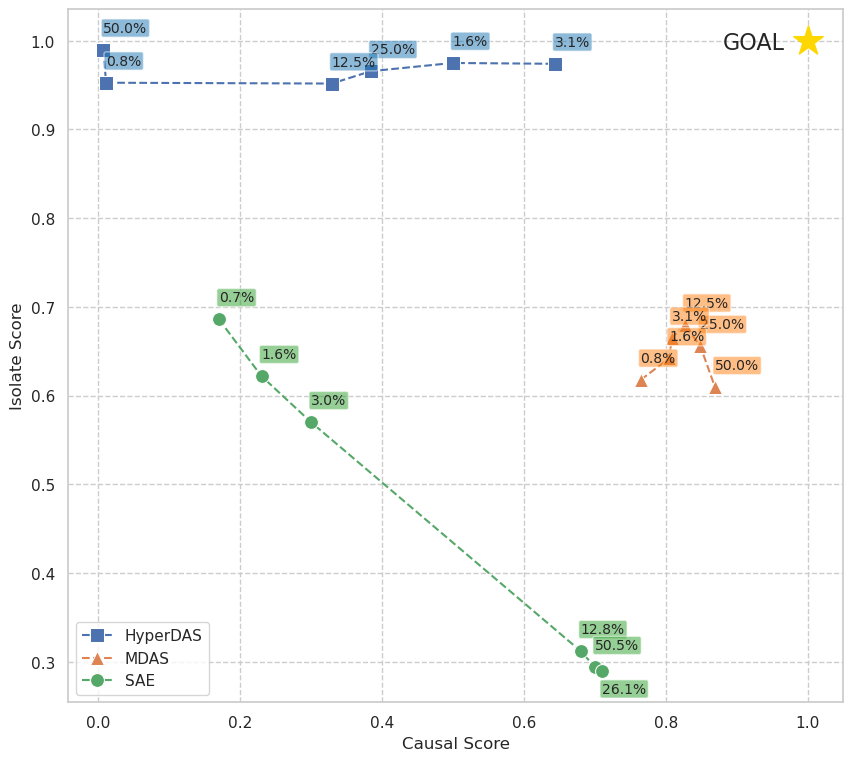

<Figure size 640x480 with 0 Axes>

In [6]:
fig, ax = plt.subplots(figsize=(10, 9))
# set background to white grid with dashed lines
sns.set(style="whitegrid", rc={"grid.linestyle": "--"})
# Make a scatter plot of the data with the causal score on the x-axis and the isolate score on the y-axis
# Use the method as the hue, and connect the points with a dashed line

markers = ["o", "^", "s"]
colors = sns.color_palette("tab10", 3)
lines = []
for method in df["Interpretabilty Method"].unique():
    df_method = df[df["Interpretabilty Method"] == method]
    line = sns.lineplot(
        data=df_method,
        x="Causal Score",
        y="Isolate Score",
        palette=colors,
        ax=ax,
        dashes=True,
        marker=markers.pop(),
        linestyle="--",
        markersize=10,
        legend=True,
    )
    lines.append(line)

children = [c for c in plt.gca().get_children() if isinstance(c, plt.Line2D)]
print(children)

methods = df["Interpretabilty Method"].unique()

for i in range(len(df)):
    color_idx = methods.tolist().index(df["Interpretabilty Method"][i])
    # equivalent of ax.text(df["Causal Score"][i], df["Isolate Score"][i], df["Dim Percents"][i], fontsize=12) with plt.annotate
    if df["Interpretabilty Method"][i] == "SAE" and df["Dim Percents"][i] == "26.1%":
        plt.annotate(
            df["Dim Percents"][i],
            (df["Causal Score"][i], df["Isolate Score"][i] - 0.025),
            fontsize=10,
            bbox=dict(
                boxstyle="round,pad=0.15", fc=colors[color_idx], ec="white", alpha=0.5
            ),
        )
    else:
        plt.annotate(
            df["Dim Percents"][i],
            (df["Causal Score"][i], df["Isolate Score"][i] + 0.02),
            fontsize=10,
            bbox=dict(
                boxstyle="round,pad=0.15", fc=colors[color_idx], ec="white", alpha=0.5
            ),
        )

# add a legend at bottom left
ax.legend(loc="lower left", labels=["HyperDAS", "MDAS", "SAE"], handles=children)
# connect the points with a dashed line

plt.scatter(1, 1, s=500, marker="*", color="gold", zorder=3)
plt.annotate("GOAL", (1.0 - 0.12, 1.0 - 0.01), size=16)

plt.show()

fig.tight_layout()
fig.savefig("country_dim_plot.pdf")

In [4]:
import os

for f in [f for f in os.listdir("/nlp/scr/sjd24") if f.startswith("hyperdas")]:
    path = os.path.join("/nlp/scr/sjd24", f)
    print(os.listdir(path))

['final_model', 'final_result.json']
['final_model', 'final_result.json']
['final_model', 'final_result.json']
['final_result.json', 'final_model']
